In [1]:
from PIL import Image
from transformers import DetrImageProcessor
import orjson

with open("val_output.json", "rb") as f:
    val_datset = orjson.loads(f.read())
images=val_datset["images"]

In [2]:
import random
image_info=random.choice(images)
image_path = image_info["file_name"]
annotaions=val_datset["annotations"]
image_id=image_info["id"]
image_annotations=[a for a in annotaions if a["image_id"]==image_id]
category=val_datset["categories"]
category={c["id"]:c['name'] for c in category}

del val_datset

In [3]:
annotaions

[{'id': 1,
  'image_id': 1,
  'category_id': 37,
  'segmentation': [[903.4615384615385,
    1079.0,
    1126.1538461538462,
    593.0769230769231,
    1265.7692307692307,
    555.0,
    1358.076923076923,
    555.0,
    1455.0,
    566.5384615384615,
    1919.0,
    675.0,
    1919.0,
    1079.0]],
  'bbox': [903.4615384615385, 555.0, 1015.5384615384615, 524.0],
  'area': 532142.1538461539},
 {'id': 2,
  'image_id': 1,
  'category_id': 25,
  'segmentation': [[971.5384615384615,
    1079.0,
    981.9230769230769,
    1060.3846153846152,
    991.1538461538461,
    1030.3846153846152,
    994.6153846153845,
    1017.6923076923076,
    1008.4615384615385,
    975.0,
    1010.7692307692307,
    961.1538461538461,
    1013.0769230769231,
    942.6923076923076,
    1016.5384615384615,
    921.9230769230769,
    1020.0,
    906.9230769230769,
    1043.076923076923,
    838.8461538461538,
    1048.8461538461538,
    819.2307692307692,
    1052.3076923076924,
    799.6153846153846,
    1055.7692

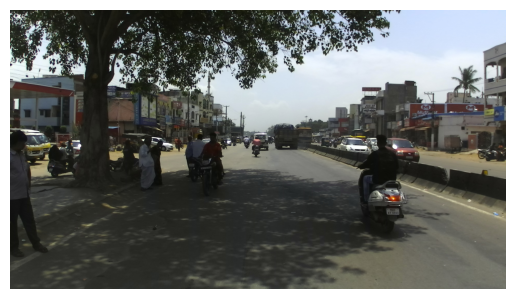

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open(image_path).convert("RGB")

plt.imshow(image)
plt.axis("off")
plt.show()

In [7]:
import json

id2label=json.load(open("id2label.json"))
label2id=json.load(open("label2id.json"))

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def show_bboxes(image, annotations, id2label=id2label, figsize=(12, 8), linewidth=2, alpha=0.8):
    """
    Display bounding boxes with labels on an image.

    Parameters:
    - image: H×W×3 array or PIL.Image
    - annotations: list of dicts, each with keys 'bbox' and 'category_id'
    - id2label: dict mapping category_id to label string
    - figsize: tuple for figure size
    - linewidth: thickness of box edges
    - alpha: transparency for boxes
    """
    fig, ax = plt.subplots(1, figsize=figsize)
    ax.imshow(image)
    ax.axis('off')

    for ann in annotations:
        x, y, w, h = ann['bbox']
        cat_id = ann['category_id']
        label = id2label.get(cat_id, str(cat_id))
        colour = plt.cm.tab20(cat_id % 20)
        rect = patches.Rectangle(
            (x, y), w, h,
            linewidth=linewidth,
            edgecolor=colour,
            facecolor='none',
            alpha=alpha
        )
        ax.add_patch(rect)
        ax.text(
            x, y - 5, label,
            color=colour, fontsize=2, weight='bold',
            backgroundcolor='white', alpha=0.7
        )

    plt.show()


def show_segmentations(image, annotations, id2label=id2label, figsize=(12, 8), linewidth=2, alpha=0.4):
    """
    Display polygonal segmentations on an image.

    Parameters:
    - image: H×W×3 array or PIL.Image
    - annotations: list of dicts, each with keys 'segmentation' and 'category_id'
    - id2label: dict mapping category_id to label string
    - figsize: tuple for figure size
    - linewidth: edge thickness of polygons
    - alpha: fill transparency for polygons
    """
    fig, ax = plt.subplots(1, figsize=figsize)
    ax.imshow(image)
    ax.axis('off')

    for ann in annotations:
        segs = ann['segmentation']
        cat_id = ann['category_id']
        label = id2label.get(cat_id, str(cat_id))
        colour = plt.cm.tab20(cat_id % 20)

        for poly in segs:
            # reshape flat list [x1,y1, x2,y2, ...] → list of (x,y) tuples
            pts = [(poly[i], poly[i+1]) for i in range(0, len(poly), 2)]
            patch = patches.Polygon(
                pts, closed=True,
                linewidth=linewidth,
                edgecolor=colour,
                facecolor=colour,
                alpha=alpha
            )
            ax.add_patch(patch)

        # label at first vertex
        x0, y0 = pts[0]
        ax.text(
            x0, y0 - 5, label,
            color='white', fontsize=2, weight='bold',
            backgroundcolor=colour, alpha=0.7
        )

    plt.show()


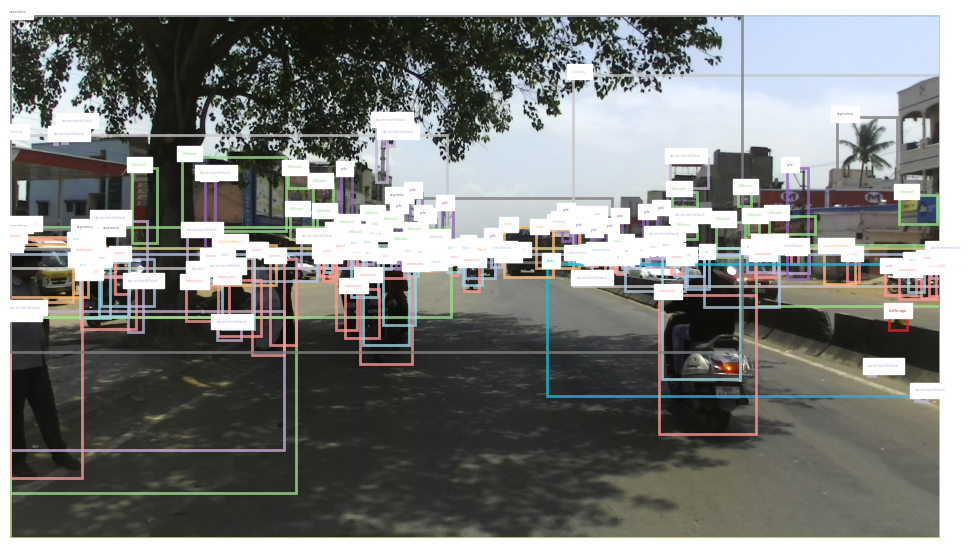

In [12]:
show_bboxes(image, image_annotations, category)

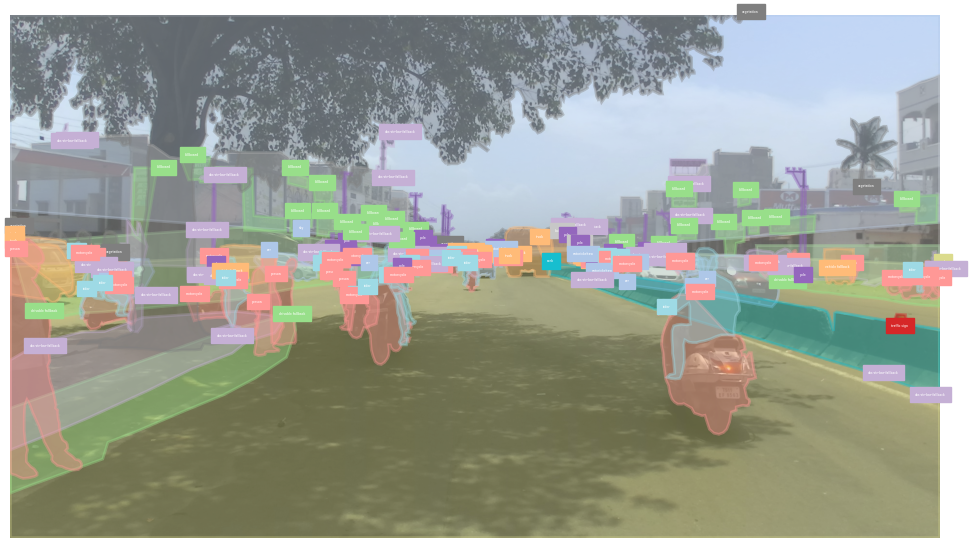

In [13]:
show_segmentations(image, image_annotations, category)